In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data',
               names=['name','landmass','zone','area','population','language','religion','bars','stripes',
                      'colours','red','green','blue','gold','white','black','orange','mainhue','circles',
                      'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate',
                      'text','topleft','botright'])

In [89]:
def func(row):
    if row['religion'] == 0:
        return 'Catholic'
    elif row['religion'] ==1:
        return 'Other Christian' 
    elif row['religion'] ==2:
        return 'Muslim' 
    elif row['religion'] ==3:
        return 'Buddhist' 
    elif row['religion'] ==4:
        return 'Hindu' 
    elif row['religion'] ==5:
        return 'Ethnic'
    elif row['religion'] ==6:
        return 'Marxist'
    else:
        return 'other'

df['religion'] = df.apply(func, axis=1)
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,Muslim,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,Marxist,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,Muslim,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,Other Christian,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,Catholic,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [ ]:
cat=df.select_dtypes(['object']) 
nom=list(cat)
for nm in nom:
    df=pd.concat([df,pd.get_dummies(df[nm], prefix=nm).astype("int64")],axis=1)

In [90]:
from sklearn.cross_validation import train_test_split 
X=df[list(df.drop(['religion','name'],inplace=False,axis=1))]
y=df['religion']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

In [92]:
cat=X_train.select_dtypes(['object']) 
nom=list(cat)

In [93]:
for nm in nom:
    X_train = pd.concat([X_train,pd.get_dummies(X_train[nm], prefix=nm).astype("int64")],axis=1)
    X_test = pd.concat([X_test,pd.get_dummies(X_test[nm], prefix=nm).astype("int64")],axis=1)
    del X_train[nm] 
    del X_test[nm]

In [94]:
from sklearn.tree import DecisionTreeClassifier 
dtree=DecisionTreeClassifier() 
dtree.fit(X_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_test['mainhue_black']=0
X_test['mainhue_brown']=0
X_test['botright_brown']=0
X_test['botright_orange']=0


**Matriz de confusión**

In [110]:
pred=dtree.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print('accuracy:',accuracy_score(y_test,pred))

                 precision    recall  f1-score   support

       Buddhist       0.00      0.00      0.00         2
       Catholic       1.00      0.89      0.94         9
         Ethnic       0.50      0.83      0.62         6
          Hindu       0.00      0.00      0.00         1
        Marxist       0.25      1.00      0.40         1
         Muslim       0.67      0.67      0.67         9
Other Christian       0.75      0.60      0.67        10
          other       0.00      0.00      0.00         1

    avg / total       0.66      0.67      0.65        39

[[0 0 0 0 2 0 0 0]
 [0 8 0 0 0 0 1 0]
 [0 0 5 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 2 0 1 6 0 0]
 [0 0 3 0 0 1 6 0]
 [0 0 0 0 0 1 0 0]]
accuracy: 0.666666666667


/home/abraham/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


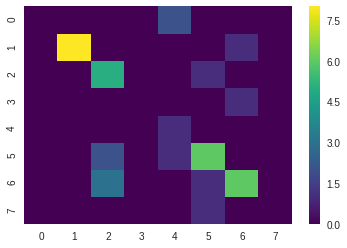

In [100]:
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,cmap='viridis')# font size

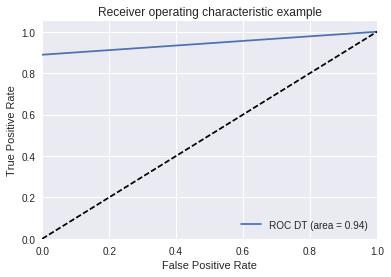

In [107]:
y1_test=y_test.apply(lambda x: 1 if x=='Catholic' else 0)
from sklearn.metrics import roc_auc_score, auc,precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y1_test,dtree.predict_proba(X_test)[:,1],pos_label=1)
dt_auc=auc(fpr,tpr)
from sklearn.metrics import roc_curve, auc
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC DT (area = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Arbol**

In [113]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("relg") 

'relg.pdf'

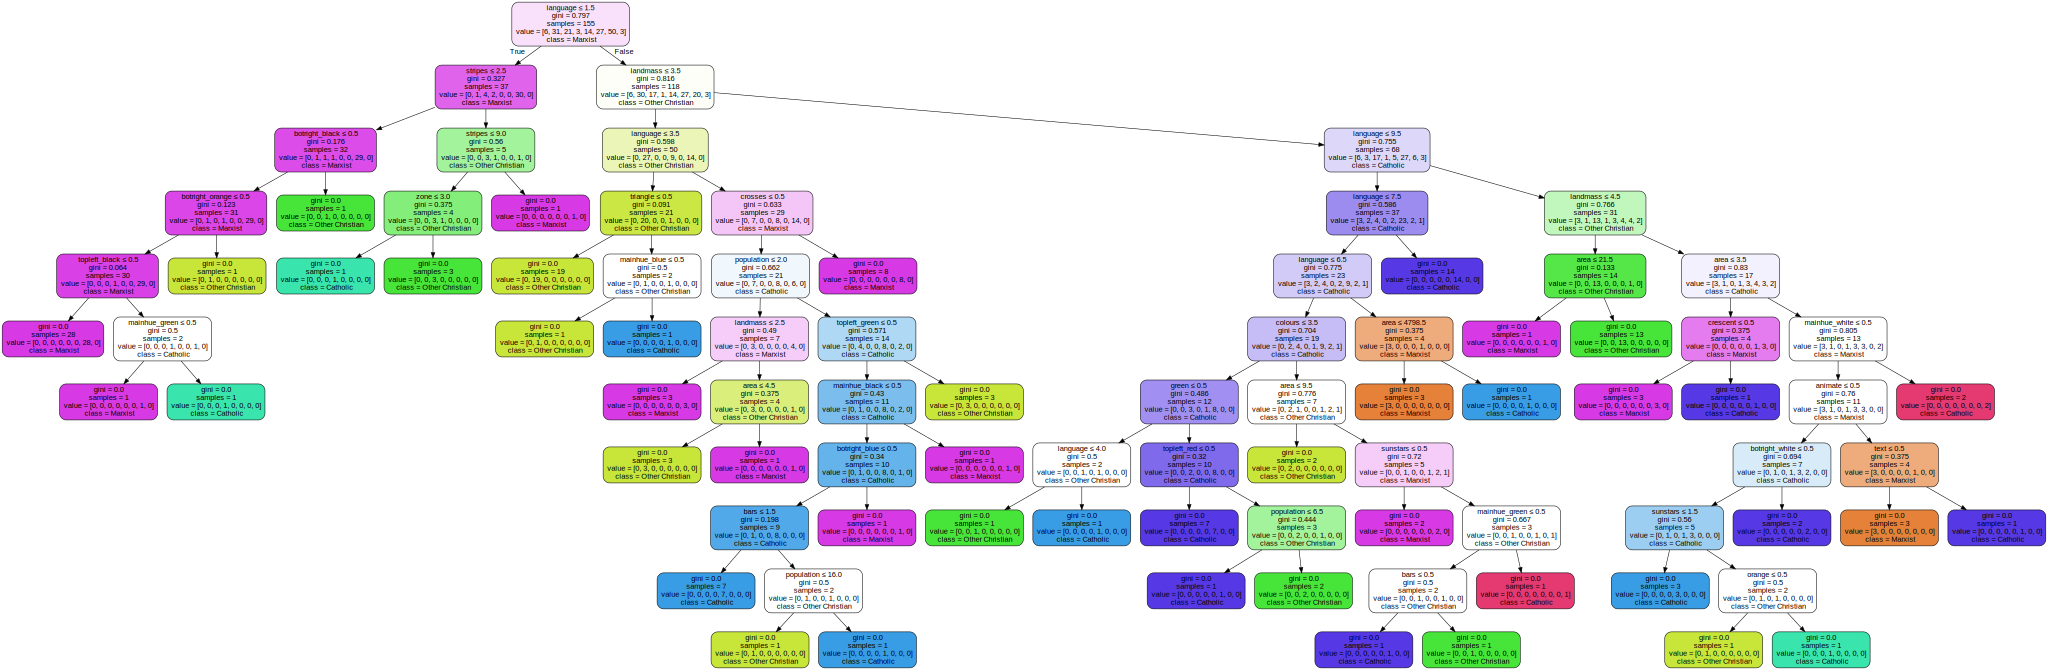

In [114]:
dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=list(X_train),  
                         class_names=list(y_train),  
                         filled=True, rounded=True,  
                         special_characters=True)  




graph = graphviz.Source(dot_data)  
graph 